## Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install pandas
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install wordcloud

In [10]:
import pandas as pd

df = pd.read_csv("C:\\Users\\HP\\Desktop\\News Navigator\\data\\bbc-text.csv")

df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [11]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [13]:
# This is a quick way to inspect the size of your DataFrame.
df.shape

(2225, 2)

In [14]:
# This code is creating a new column named 'encoded_category' in the DataFrame df
# by encoding the values in the 'category' column into numerical codes.

df['encoded_category'] = df['category'].astype('category').cat.codes

df.head(10)

,category,text,encoded_category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
7,sport,henman hopes ended in dubai third seed tim hen...,3
8,sport,wilkinson fit to face edinburgh england captai...,3
9,entertainment,last star wars not for children the sixth an...,1


In [15]:
df.columns

Index(['category', 'text', 'encoded_category'], dtype='object')

In [16]:
# Count the total number of duplicated rows
df.duplicated().sum()

99

In [17]:
# Remove duplicated rows
df=df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
# Check for missing values.
df.isnull().sum()

category            0
text                0
encoded_category    0
dtype: int64

## Lowercase Conversion

*   Here we're converting the 'text' and 'title' columns in my dataset (mydata_1) to lowercase.
*   This ensures uniformity in letter case, eliminating potential



In [20]:
# apply lowercase conversion to a 'text' column
import re

df.loc[:, 'text'] = df['text'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
df

,category,text,encoded_category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,0
2221,politics,kilroy unveils immigration policy exchatshow h...,2
2222,entertainment,rem announce new glasgow concert us band rem h...,1
2223,politics,how political squabbles snowball it s become c...,2


## Count and Remove Emails

In [21]:
df1= df.copy(deep=True)

In [22]:
import re

df1['emails']=df1['text'].apply(lambda x:re.findall(r'([z-z0-9+._-]+@[z-z0-9+._-]+\.[z-z0-9+_-]+\b)',x))
df1['email_counts']=df1['emails'].apply(lambda x: len(x))

In [23]:
df1[df1['email_counts']>0]

,category,text,encoded_category,emails,email_counts


## Count URLs and Remove it

In [24]:
df1['url_present']=df1['text'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))
df1[df1['url_present']>0]

,category,text,encoded_category,emails,email_counts,url_present


## Special Chars removal or punctuation removal

In [25]:
len(df['text'][0])

4280

In [26]:
df.loc[:, 'text']=df['text'].apply(lambda x:re.sub(r'[^\w ]+',"",x))


In [27]:
len(df['text'][0])

4280

## Whitespace Removal
 - Leading and Trailing Whitespaces
 - Extra Whitespaces Within Text

In [29]:
len(df['text'][0])

4280

In [30]:
df.loc[:, 'text']=df["text"].apply(lambda x: ' '.join(x.split()))

In [31]:
len(df['text'][0])

4210

In [32]:
# Remove leading and trailing whitespaces
df.loc[:, 'text'] = df["text"].apply(lambda x: x.strip())

In [33]:
len(df['text'][0])

4210

## Remove HTML tags

In [35]:
# Check if the 'new_text' column contains HTML tags
contains_html_tags = df['text'].str.contains(r'<[^>]+>', regex=True)
df[contains_html_tags]

,category,text,encoded_category


## Remove Duplicated Values

In [36]:
filter=df['text'].duplicated()
df[filter]

,category,text,encoded_category
510,sport,davenport hits out at wimbledon world number o...,3
2014,sport,desailly backs blues revenge trip marcel desai...,3
2167,tech,no redraft for eu patent law a proposed europe...,4


In [37]:
df['text'].duplicated().sum()

3

In [38]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,category,text,encoded_category
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say th...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1
...,...,...,...
2118,business,cars pull down us retail figures us retail sal...,0
2119,politics,kilroy unveils immigration policy exchatshow h...,2
2120,entertainment,rem announce new glasgow concert us band rem h...,1
2121,politics,how political squabbles snowball it s become c...,2


In [39]:
df['text'].duplicated().sum()

0

## Removing StopWords

In [40]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS)

326

In [41]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)

    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)

In [42]:
len(df["text"][0])

4210

In [43]:
df["new_text"] = df.text.apply(preprocess)
df

,category,text,encoded_category,new_text
0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...,0,worldcom boss left books worldcom boss bernie ...
2,sport,tigers wary of farrell gamble leicester say th...,3,tigers wary farrell gamble leicester rushed ma...
3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership newc...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean s raids box office ocean s crime caper s...
...,...,...,...,...
2118,business,cars pull down us retail figures us retail sal...,0,cars pull retail figures retail sales fell 03 ...
2119,politics,kilroy unveils immigration policy exchatshow h...,2,kilroy unveils immigration policy exchatshow h...
2120,entertainment,rem announce new glasgow concert us band rem h...,1,rem announce new glasgow concert band rem anno...
2121,politics,how political squabbles snowball it s become c...,2,political squabbles snowball s commonplace arg...


In [44]:
df.drop('text', axis=1, inplace=True)

## Convert into base or root form of word

In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")

def make_to_base(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)

  for token in doc:
    lemma=token.lemma_
    if lemma=='_PRON' or lemma=='be':
      lemma=token.text

    x_list.append(lemma)
  return ' '.join(x_list)

In [46]:
df['new_text'][0]

'tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different years time according expert panel gathered annual consumer electronics las vegas discuss new technologies impact favourite pastimes leading trend programmes content delivered viewers home networks cable satellite telecoms companies broadband service providers rooms portable devices talkedabout technologies ces digital personal video recorders dvr pvr settop boxes like s tivo uk s sky system allow people record store play pause forward wind tv programmes want essentially technology allows personalised tv builtin highdefinition tv sets big business japan slower europe lack highdefinition programming people forward wind adverts forget abiding network channel schedules putting alacarte entertainment networks cable satellite companies worried means terms advertising revenues brand identity viewer loyalty channels leads technology moment c

In [47]:
df['new_text']=df['new_text'].apply(lambda x: make_to_base(x))

In [48]:
df['new_text'][0]

'tv future hand viewer home theatre system plasma highdefinition tvs digital video recorder move living room way people watch tv radically different year time accord expert panel gather annual consumer electronic las vegas discuss new technology impact favourite pastime lead trend programme content deliver viewer home network cable satellite telecom company broadband service provider room portable device talkedabout technology ce digital personal video recorder dvr pvr settop box like s tivo uk s sky system allow people record store play pause forward wind tv programme want essentially technology allow personalised tv builtin highdefinition tv set big business japan slower europe lack highdefinition program people forward wind advert forget abide network channel schedule put alacarte entertainment network cable satellite company worry mean term advertising revenue brand identity viewer loyalty channel lead technology moment concern raise europe particularly grow uptake service like sky

## Histogram of the count of text

In [49]:
df['count'] = df['new_text'].apply(lambda x: len(x.split()))

In [50]:
df.head()

,category,encoded_category,new_text,count
0,tech,4,tv future hand viewer home theatre system plas...,370
1,business,0,worldcom boss leave book worldcom boss bernie ...,176
2,sport,3,tiger wary farrell gamble leicester rush make ...,107
3,sport,3,yeade face newcastle fa cup premiership newcas...,257
4,entertainment,1,ocean s raids box office ocean s crime caper s...,175


<Figure size 800x800 with 0 Axes>

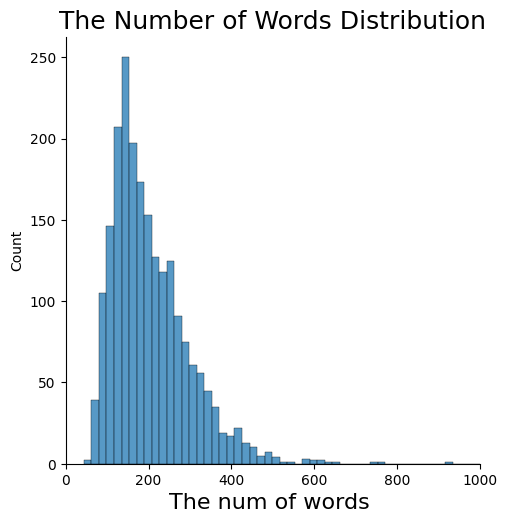

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 1000)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

From the graph, you can conclude that the number of words distribution is a skewed distribution. This means that there are more texts with a small number of words than there are texts with a large number of words. The median number of words is around 200, but the distribution has a long tail, meaning that there are a few texts with a very large number of words.

This distribution is typical of many types of text data, such as news articles, blog posts, and social media posts. It is also typical of many other types of data, such as income, height, and weight.

## Bar plot for each of the new category

In [52]:
# This code is calculating the count of unique values in the 'category' column of the DataFrame df

category_count = df['category'].value_counts()
category_count

category
business         503
sport            502
politics         403
entertainment    369
tech             346
Name: count, dtype: int64

In [53]:
categories=category_count.index

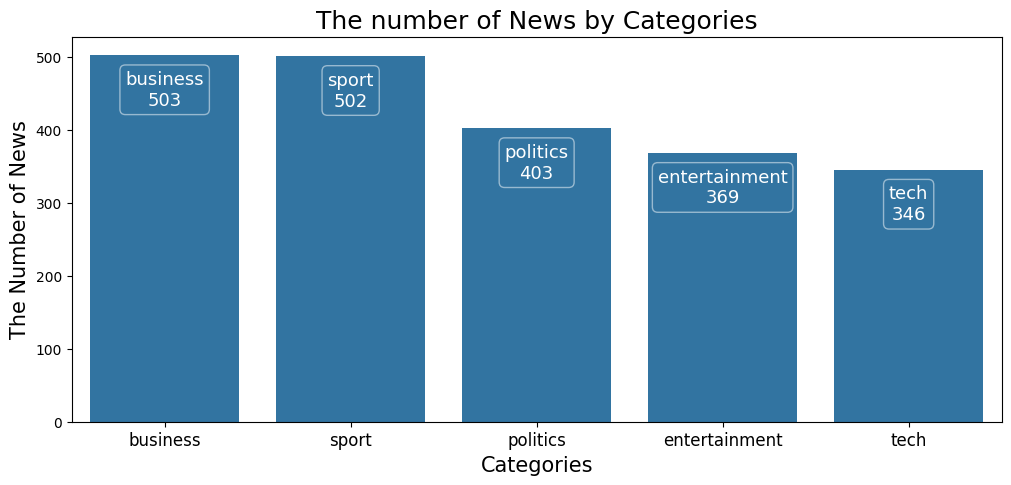

In [54]:
# This code is creating a horizontal bar plot to visualize the distribution of the number of news articles in each category.

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [55]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [56]:
has_duplicates = df['new_text'].duplicated().sum()
has_duplicates

5

In [57]:
df = df.drop_duplicates(subset=['new_text'], keep='first').reset_index(drop=True)
df

,category,encoded_category,new_text,count
0,tech,4,tv future hand viewer home theatre system plas...,370
1,business,0,worldcom boss leave book worldcom boss bernie ...,176
2,sport,3,tiger wary farrell gamble leicester rush make ...,107
3,sport,3,yeade face newcastle fa cup premiership newcas...,257
4,entertainment,1,ocean s raids box office ocean s crime caper s...,175
...,...,...,...,...
2113,business,0,car pull retail figure retail sale fall 03 jan...,177
2114,politics,2,kilroy unveil immigration policy exchatshow ho...,98
2115,entertainment,1,rem announce new glasgow concert band rem anno...,168
2116,politics,2,political squabble snowball s commonplace argu...,371


In [58]:
has_duplicates = df['new_text'].duplicated().sum()
has_duplicates

0

In [59]:
df['count'].max()

2025

In [60]:
df['count'].min()

44

In [61]:
df['count'].mean()

208.0930122757318

In [62]:
df1['category'].value_counts()

category
sport            504
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

## Word Cloud Visualization
- A word cloud provides a visual representation of the most frequently occurring words in a text or a collection of texts.

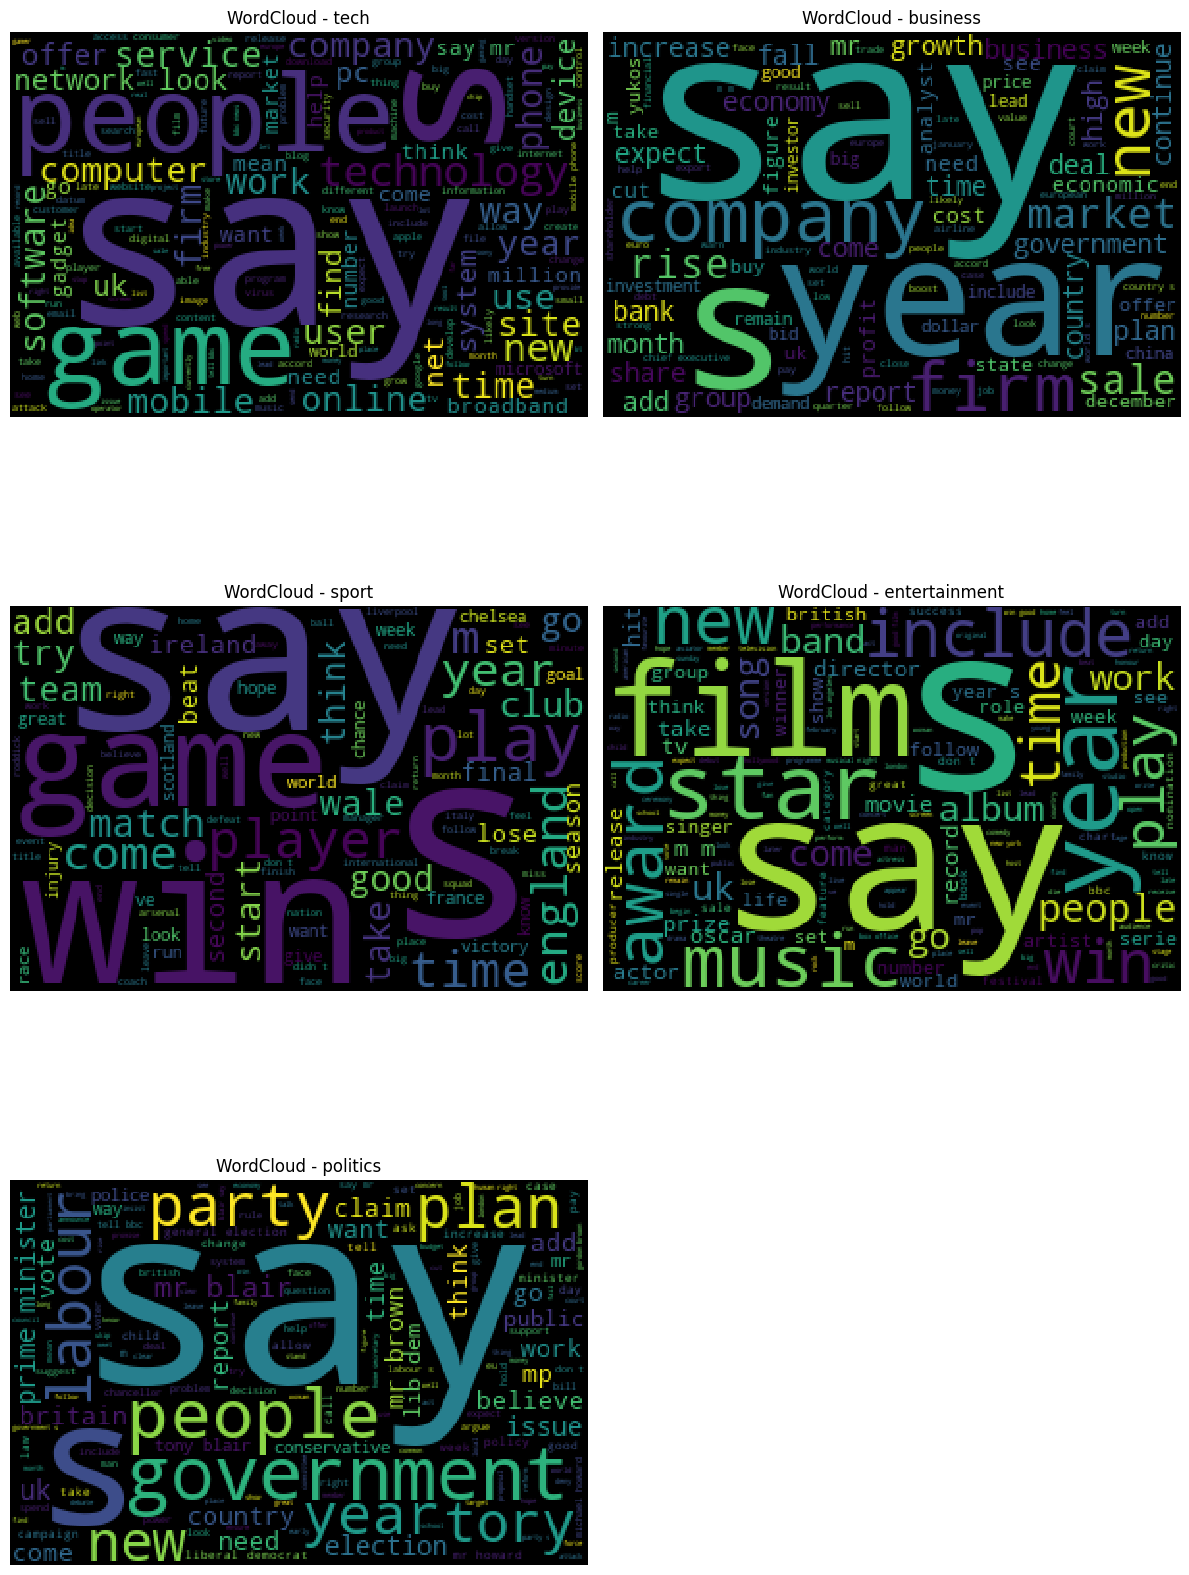

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame
categories = df['category'].unique()

# Calculate the number of rows for subplots
num_rows = (len(categories) + 1) // 2

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))
axes = axes.flatten()

# Generate WordCloud for each category
for i, category in enumerate(categories):
    category_text = ' '.join(df[df['category'] == category]['new_text'])
    wc = WordCloud(width=300, height=200).generate(category_text)
    
    # Display WordCloud on each subplot
    axes[i].imshow(wc, interpolation='nearest')
    axes[i].set_title(f'WordCloud - {category}')
    axes[i].axis('off')

# Handle the case where the number of categories is odd
if len(categories) % 2 == 1:
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Common words removal

In [66]:
len(df['new_text'][0])

2514

In [67]:
text = ' '.join(df['new_text'])

In [68]:
len(text)

2956713

In [69]:
text=text.split()

In [70]:
len(text)

440741

In [71]:
freq_comm = pd.Series(text).value_counts()
freq_comm

s               8665
say             7841
mr              2851
year            2704
people          1890
                ... 
000vote            1
disaffection       1
lorna              1
fitzsimon          1
struck             1
Name: count, Length: 27355, dtype: int64

In [72]:
single_letter_word_counts = freq_comm[freq_comm.index.str.len() == 1]

single_letter_word_counts

s    8665
m    1811
t    1246
o     307
2     284
d     267
1     247
3     244
4     213
5     202
g     169
v     126
6     115
j      91
8      81
7      69
9      69
r      59
b      51
c      44
w      37
p      36
l      35
n      29
k      21
h      19
f      17
e      16
x      15
y      13
q       6
u       2
0       1
Name: count, dtype: int64

In [73]:
import string

# Filter for alphabetic single-letter words
alphabet_letters = string.ascii_lowercase
alphabetic_single_letter_word_counts = single_letter_word_counts[single_letter_word_counts.index.isin(list(alphabet_letters))]

# Display the alphabetic single-letter word counts
alphabetic_single_letter_word_counts


s    8665
m    1811
t    1246
o     307
d     267
g     169
v     126
j      91
r      59
b      51
c      44
w      37
p      36
l      35
n      29
k      21
h      19
f      17
e      16
x      15
y      13
q       6
u       2
Name: count, dtype: int64

In [74]:
total_counts = alphabetic_single_letter_word_counts.sum()
total_counts

13082

In [75]:
df['new_text']=df['new_text'].apply(lambda x: ' '.join([t for t in x.split() if t not in alphabetic_single_letter_word_counts   ]))

In [76]:
len(df['new_text'][0])

2502

In [77]:
df

,category,encoded_category,new_text,count
0,tech,4,tv future hand viewer home theatre system plas...,370
1,business,0,worldcom boss leave book worldcom boss bernie ...,176
2,sport,3,tiger wary farrell gamble leicester rush make ...,107
3,sport,3,yeade face newcastle fa cup premiership newcas...,257
4,entertainment,1,ocean raids box office ocean crime caper seque...,175
...,...,...,...,...
2113,business,0,car pull retail figure retail sale fall 03 jan...,177
2114,politics,2,kilroy unveil immigration policy exchatshow ho...,98
2115,entertainment,1,rem announce new glasgow concert band rem anno...,168
2116,politics,2,political squabble snowball commonplace argue ...,371


## Tokenization

In [78]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")


df['tokenized_text'] = df['new_text'].apply(lambda x: [token.text for token in nlp(x)])

In [79]:
df

,category,encoded_category,new_text,count,tokenized_text
0,tech,4,tv future hand viewer home theatre system plas...,370,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,0,worldcom boss leave book worldcom boss bernie ...,176,"[worldcom, boss, leave, book, worldcom, boss, ..."
2,sport,3,tiger wary farrell gamble leicester rush make ...,107,"[tiger, wary, farrell, gamble, leicester, rush..."
3,sport,3,yeade face newcastle fa cup premiership newcas...,257,"[yeade, face, newcastle, fa, cup, premiership,..."
4,entertainment,1,ocean raids box office ocean crime caper seque...,175,"[ocean, raids, box, office, ocean, crime, cape..."
...,...,...,...,...,...
2113,business,0,car pull retail figure retail sale fall 03 jan...,177,"[car, pull, retail, figure, retail, sale, fall..."
2114,politics,2,kilroy unveil immigration policy exchatshow ho...,98,"[kilroy, unveil, immigration, policy, exchatsh..."
2115,entertainment,1,rem announce new glasgow concert band rem anno...,168,"[rem, announce, new, glasgow, concert, band, r..."
2116,politics,2,political squabble snowball commonplace argue ...,371,"[political, squabble, snowball, commonplace, a..."


In [80]:
# Assuming your DataFrame is named 'df'
df.to_csv('processed_data.csv', index=False)